In [1]:
import os
import nrrd
import matplotlib.pyplot as plt
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
import numpy as np

%matplotlib inline

In [2]:
maskpath = r'/Users/jenniferwh/Dropbox (Allen Institute)/Mesoscale Connectome Papers in Progress/2019 DMN/fMRI_masks/all ICA components and masks zscore 1'
savepath = r'/Users/jenniferwh/Dropbox (Allen Institute)/Mesoscale Connectome Papers in Progress/2019 DMN/_new_figures/Figure_S1'

In [3]:
mcc = MouseConnectivityCache(manifest_file = '../Connectivity/mouse_connectivity_manifest.json', resolution=100)

In [4]:
structure_tree = mcc.get_structure_tree()

In [5]:
coarse_structures = structure_tree.get_structures_by_set_id([2])

In [6]:
coarse_structure_ids = [structure['id'] for structure in coarse_structures]

In [7]:
len(coarse_structure_ids)

12

In [8]:
names = []
ids = []
masks = []

for structure in coarse_structures:
    structure_name = structure['name']
    structure_id = structure['id']
    mask = mcc.get_structure_mask(structure_id)
    names.append(structure_name)
    ids.append(structure_id)
    masks.append(mask[0])

2020-03-24 14:58:48,938 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_698.nrrd
2020-03-24 14:58:48,995 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1089.nrrd
2020-03-24 14:58:49,057 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_703.nrrd
2020-03-24 14:58:49,086 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_477.nrrd
2020-03-24 

In [9]:
names.append(u'fiber tracts')
ids.append(1009)
masks.append(mcc.get_structure_mask(1009)[0])

In [10]:
names

['Isocortex',
 'Olfactory areas',
 'Hippocampal formation',
 'Cortical subplate',
 'Striatum',
 'Pallidum',
 'Thalamus',
 'Hypothalamus',
 'Midbrain',
 'Pons',
 'Medulla',
 'Cerebellum',
 'fiber tracts']

In [11]:
ICA0, _ = nrrd.read(os.path.join(maskpath, 'ica_all_05_icasso_iter_1000_comp_0_mask_z_1_allen_masked_sym_thresh_2.nrrd'))

In [12]:
np.unique(ICA0)

array([0., 2.], dtype=float32)

In [13]:
ICA0.shape

(132, 80, 114)

In [14]:
masks[0].shape

(132, 80, 114)

In [15]:
root_mask, _ = mcc.get_structure_mask(997)

In [28]:
percent_coverage = []
for mask in masks:
    overlap = float(np.sum(mask[np.where(ICA0)]))/float(np.sum(root_mask[np.where(ICA0)]))
    percent_coverage.append(overlap)

In [29]:
percent_coverage

[0.901894994513379,
 0.0,
 0.015257027095467206,
 0.0,
 0.016797501477167215,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.06446779775470583]

In [30]:
percent = np.array(percent_coverage)
names = np.array(names)
names[np.where(percent > 0)]

array(['Isocortex', 'Hippocampal formation', 'Striatum', 'fiber tracts'],
      dtype='<U21')

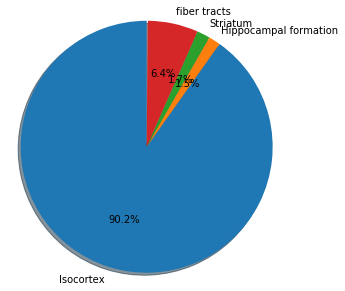

In [31]:
labels = names[np.where(percent > 0)]
sizes = percent[np.where(percent > 0)]

fig, ax = plt.subplots(figsize = (5, 5))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig(os.path.join(savepath, 'ICA_0.pdf'), bbox_inches='tight', 
            pad_inches=0.3, transparent = True, dpi=300)

In [32]:
ICA1, _ = nrrd.read(os.path.join(maskpath, 'ica_all_05_icasso_iter_1000_comp_1_mask_z_1_allen_masked_sym_thresh_2.nrrd'))

In [33]:
percent_coverage = []
for mask in masks:
    overlap = float(np.sum(mask[np.where(ICA1)]))/float(np.sum(root_mask[np.where(ICA1)]))
    percent_coverage.append(overlap)

In [34]:
percent = np.array(percent_coverage)
names = np.array(names)
names[np.where(percent > 0)]

array(['Isocortex', 'Olfactory areas', 'Hippocampal formation',
       'Cortical subplate', 'Striatum', 'Pallidum', 'Thalamus',
       'Midbrain', 'fiber tracts'], dtype='<U21')

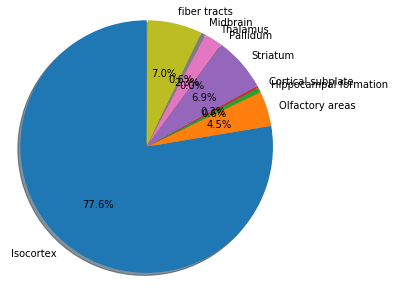

In [35]:
labels = names[np.where(percent > 0)]
sizes = percent[np.where(percent > 0)]

fig, ax = plt.subplots(figsize = (5, 5))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig(os.path.join(savepath, 'ICA_1.pdf'), bbox_inches='tight', 
            pad_inches=0.3, transparent = True, dpi=300)

In [36]:
ICA2, _ = nrrd.read(os.path.join(maskpath, 'ica_all_05_icasso_iter_1000_comp_2_mask_z_1_allen_masked_sym_thresh_2.nrrd'))

In [37]:
percent_coverage = []
for mask in masks:
    overlap = float(np.sum(mask[np.where(ICA2)]))/float(np.sum(root_mask[np.where(ICA2)]))
    percent_coverage.append(overlap)

In [38]:
percent = np.array(percent_coverage)
names = np.array(names)
names[np.where(percent > 0)]

array(['Isocortex', 'Olfactory areas', 'Cortical subplate', 'Striatum',
       'Pallidum', 'fiber tracts'], dtype='<U21')

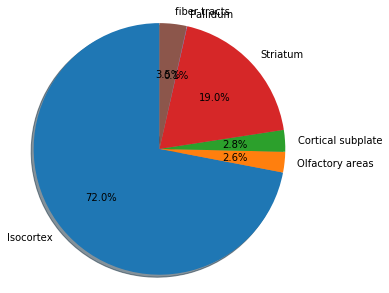

In [39]:
labels = names[np.where(percent > 0)]
sizes = percent[np.where(percent > 0)]

fig, ax = plt.subplots(figsize = (5, 5))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig(os.path.join(savepath, 'ICA_2.pdf'), bbox_inches='tight', 
            pad_inches=0.3, transparent = True, dpi=300)

In [40]:
ICA3, _ = nrrd.read(os.path.join(maskpath, 'ica_all_05_icasso_iter_1000_comp_3_mask_z_1_allen_masked_sym_thresh_2.nrrd'))

In [41]:
percent_coverage = []
for mask in masks:
    overlap = float(np.sum(mask[np.where(ICA3)]))/float(np.sum(root_mask[np.where(ICA3)]))
    percent_coverage.append(overlap)

In [42]:
percent = np.array(percent_coverage)
names = np.array(names)
names[np.where(percent > 0)]

array(['Isocortex', 'Olfactory areas', 'Hippocampal formation',
       'Thalamus', 'Midbrain', 'fiber tracts'], dtype='<U21')

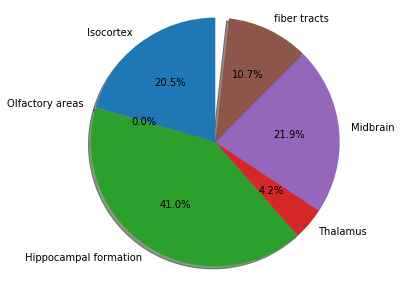

In [43]:
labels = names[np.where(percent > 0)]
sizes = percent[np.where(percent > 0)]

fig, ax = plt.subplots(figsize = (5, 5))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig(os.path.join(savepath, 'ICA_3.pdf'), bbox_inches='tight', 
            pad_inches=0.3, transparent = True, dpi=300)

In [44]:
ICA4, _ = nrrd.read(os.path.join(maskpath, 'ica_all_05_icasso_iter_1000_comp_4_mask_z_1_allen_masked_sym_thresh_2.nrrd'))

In [45]:
percent_coverage = []
for mask in masks:
    overlap = float(np.sum(mask[np.where(ICA4)]))/float(np.sum(root_mask[np.where(ICA4)]))
    percent_coverage.append(overlap)

In [46]:
percent = np.array(percent_coverage)
names = np.array(names)
names[np.where(percent > 0)]

array(['Isocortex', 'Hippocampal formation', 'Midbrain', 'fiber tracts'],
      dtype='<U21')

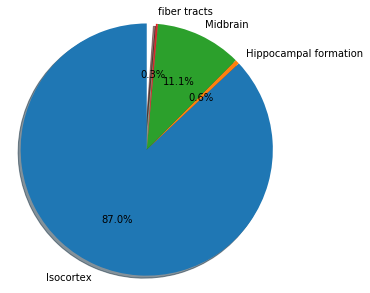

In [47]:
labels = names[np.where(percent > 0)]
sizes = percent[np.where(percent > 0)]

fig, ax = plt.subplots(figsize = (5, 5))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig(os.path.join(savepath, 'ICA_4.pdf'), bbox_inches='tight', 
            pad_inches=0.3, transparent = True, dpi=300)

In [48]:
maskpath

'/Users/jenniferwh/Dropbox (Allen Institute)/Mesoscale Connectome Papers in Progress/2019 DMN/fMRI_masks/all ICA components and masks zscore 1'

In [49]:
core_mask, _ = nrrd.read(r'/Users/jenniferwh/Dropbox (Allen Institute)/Mesoscale Connectome Papers in Progress/2019 DMN/fMRI_masks/dmn_mask_and_core.nrrd')

In [51]:
print(np.unique(core_mask))
core_mask[np.where(core_mask == 1)] = 0
print(np.unique(core_mask))

[0. 1. 2.]
[0. 2.]


In [56]:
percent_coverage = []
for mask in masks:
    overlap = float(np.sum(mask[np.where(core_mask)]))/float(
        np.sum(root_mask[np.where(core_mask)]))
    percent_coverage.append(overlap)

In [57]:
percent = np.array(percent_coverage)
names = np.array(names)
names[np.where(percent > 0)]

array(['Isocortex', 'Olfactory areas', 'Hippocampal formation',
       'Cortical subplate', 'Striatum', 'Pallidum', 'Thalamus',
       'Midbrain', 'fiber tracts'], dtype='<U21')

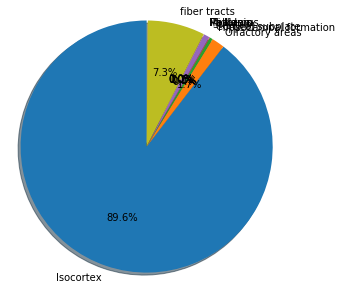

In [58]:
labels = names[np.where(percent > 0)]
sizes = percent[np.where(percent > 0)]

fig, ax = plt.subplots(figsize = (5, 5))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig(os.path.join(savepath, 'DMN_core.pdf'), bbox_inches='tight', 
            pad_inches=0.3, transparent = True, dpi=300)

In [59]:
savepath

'/Users/jenniferwh/Dropbox (Allen Institute)/Mesoscale Connectome Papers in Progress/2019 DMN/_new_figures/Figure_S1'

In [61]:
percent_coverage

[0.8957435770193761,
 0.016624185144249206,
 0.004037624343040174,
 0.0008120361807231634,
 0.007330882187084113,
 0.00013533936345386057,
 0.0004060180903615817,
 0.0,
 0.00011278280287821714,
 0.0,
 0.0,
 0.0,
 0.0732862653102655]

In [64]:
labels

array(['Isocortex', 'Olfactory areas', 'Hippocampal formation',
       'Cortical subplate', 'Striatum', 'Pallidum', 'Thalamus',
       'Midbrain', 'fiber tracts'], dtype='<U21')